In [3]:
# 2: given the time period, which company has the most growth on stock price (bar chart?)
# 3: spread of manager's age (box plot, info)

In [4]:
# import Dependencies
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
top_30_tickers =[
    "PLTR", "TLRY", "TSLA", "LCID", "AAPL", "NIO", 
    "AMD", "AMZN", "RIVN", "F", "BAC", "T",
    "MPW", "NVDA", "AMC", "INTC", "ITUB", "JNJ", 
    "VALE", "SOFI", "MARA", "DDOG", "LYG", "DISH",
    "AAL", "OPEN", "SWN", "PFE", "HPE", "JBLU"
]

In [6]:
top_30_stock_asending = pd.DataFrame()
data = yf.Ticker("AAPL").history(start="2018-01-01", end="2023-06-30")

# Resample the data to a quarterly frequency, taking the last day's data for each quarter
quarterly_data = data.resample('Q').last()

# Sort data in descending order
data_sorted = quarterly_data.sort_index(ascending=True)

top_30_stock_asending["Date"] = data_sorted.index

top_30_stock_asending.set_index("Date", inplace=True)

top_30_stock_asending["AAPL Price"] = data_sorted["Close"]

for ticker in top_30_tickers:
    if ticker != "AAPL":
        data = yf.Ticker(ticker).history(start="2018-01-01", end="2023-06-30")
        quarterly_data = data.resample('Q').last()
        data_sorted = quarterly_data.sort_index(ascending=True)
        top_30_stock_asending[ticker + " Price"] = data_sorted["Close"]

top_30_stock_asending.head()
top_30_stock_asending.to_csv('top_30_stock_asending.csv', index=False)


In [7]:
# # Read the data
# df = pd.read_csv('top_30_stock_asending.csv')

# # Compute growth for each ticker
# growth = {}
# for ticker in df.columns:
#     initial_price = df[ticker].iloc[0]
#     final_price = df[ticker].iloc[-1]
#     growth[ticker] = (final_price - initial_price) / initial_price

# # Sort tickers by growth and get top 10
# top_10_tickers = sorted(growth, key=growth.get, reverse=True)[:10]

# # Plot only the top 10 tickers
# for ticker in top_10_tickers:
#     plt.plot(df[ticker], label=ticker)
    
#     # Annotate the last point
#     y_last = df[ticker].iloc[-1]  # Gets the y-coordinate of the last point
#     plt.annotate(ticker, (len(df)-1, y_last), textcoords="offset points", xytext=(5,5), ha='center', fontsize=6)

# # Define the quarters
# quarters = [
#     '2018 Q1', '2018 Q2', '2018 Q3', '2018 Q4', '2019 Q1', '2019 Q2', 
#     '2019 Q3', '2019 Q4', '2020 Q1', '2020 Q2', '2020 Q3', '2020 Q4', 
#     '2021 Q1', '2021 Q2', '2021 Q3', '2021 Q4', '2022 Q1', '2022 Q2', 
#     '2022 Q3', '2022 Q4', '2023 Q1', '2023 Q2'
# ]

# # Set x-ticks and x-labels
# plt.xticks(range(len(quarters)), quarters, rotation=90)

# # Add labels, title, and legend
# plt.ylabel('Price')
# plt.title('Stock Prices for Top 10 Growth Tickers')
# plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))

# # Set figure size
# plt.figure(figsize=(55, 30))

# # Display the plot
# plt.show()


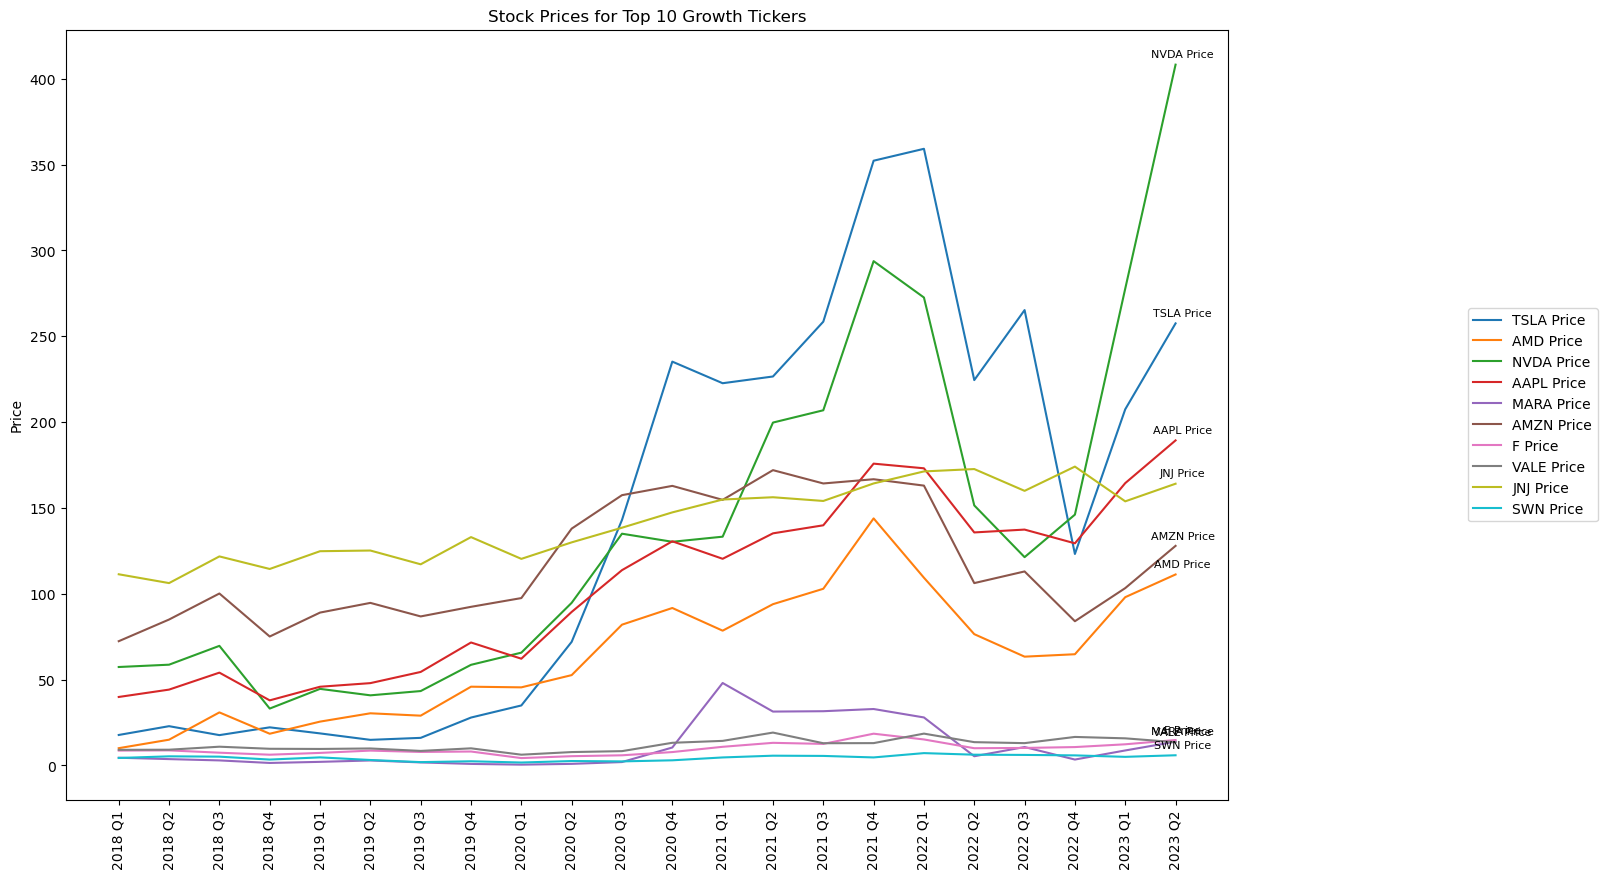

In [8]:
# Read the data
df = pd.read_csv('top_30_stock_asending.csv')

# Compute growth rate for each ticker
growth = {}
for ticker in df.columns:
    initial_price = df[ticker].iloc[0]
    final_price = df[ticker].iloc[-1]
    growth_rate = (final_price - initial_price) / initial_price
    if growth_rate > 0:  # Only consider positive growth rates
        growth[ticker] = growth_rate

# Sort tickers by growth rate and get top 10
top_10_tickers = sorted(growth, key=growth.get, reverse=True)[:10]

# Set figure size
plt.figure(figsize=(15, 10))

# Plot only the top 10 tickers
for ticker in top_10_tickers:
    plt.plot(df[ticker], label=ticker)
    
    # Annotate the last point with a smaller font size
    y_last = df[ticker].iloc[-1]  # Gets the y-coordinate of the last point
    plt.annotate(ticker, (len(df)-1, y_last), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

# Define the quarters
quarters = [
    '2018 Q1', '2018 Q2', '2018 Q3', '2018 Q4', '2019 Q1', '2019 Q2', 
    '2019 Q3', '2019 Q4', '2020 Q1', '2020 Q2', '2020 Q3', '2020 Q4', 
    '2021 Q1', '2021 Q2', '2021 Q3', '2021 Q4', '2022 Q1', '2022 Q2', 
    '2022 Q3', '2022 Q4', '2023 Q1', '2023 Q2'
]

# Set x-ticks and x-labels
plt.xticks(range(len(quarters)), quarters, rotation=90)

# Add labels, title, and legend
plt.ylabel('Price')
plt.title('Stock Prices for Top 10 Growth Tickers')
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))

# Display the plot
plt.show()


In [9]:
# # Read the data
# df = pd.read_csv('top_30_stock_asending.csv')

# # Assuming that your CSV's first row contains ticker names and the rows below contain prices

# for ticker in df.columns:
#     plt.plot(df[ticker], label=ticker)

#     # Annotate the last point
#     y_last = df[ticker].iloc[-1]  # Gets the y-coordinate of the last point
#     plt.annotate(ticker, (len(df)-1, y_last), textcoords="offset points", xytext=(5,5), ha='center')

# # Define the quarters
# quarters = [
#     '2018 Q1', '2018 Q2', '2018 Q3', '2018 Q4', '2019 Q1', '2019 Q2', 
#     '2019 Q3', '2019 Q4', '2020 Q1', '2020 Q2', '2020 Q3', '2020 Q4', 
#     '2021 Q1', '2021 Q2', '2021 Q3', '2021 Q4', '2022 Q1', '2022 Q2', 
#     '2022 Q3', '2022 Q4', '2023 Q1', '2023 Q2'
# ]

# # Plot the data
# for ticker in df.columns:
#     plt.plot(df[ticker])

# # Set x-ticks and x-labels
# plt.xticks(range(len(quarters)), quarters, rotation=45)

# # Add labels, title, and legend
# plt.ylabel('Price')
# plt.xticks(rotation=90)
# plt.title('Stock Prices')
# plt.legend(loc='best')
# plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))

# plt.figure(figsize=(55, 30))

# # Display the plot
# plt.show()



In [10]:
# Example tickers
top_30_tickers =[
    "PLTR", "TLRY", "TSLA", "LCID", "AAPL", "NIO", 
    "AMD", "AMZN", "RIVN", "F", "BAC", "T",
    "MPW", "NVDA", "AMC", "INTC", "ITUB", "JNJ", 
    "VALE", "SOFI", "MARA", "DDOG", "LYG", "DISH",
    "AAL", "OPEN", "SWN", "PFE", "HPE", "JBLU"
]

# Lists to store data
company_names = []
officer_ages = []

for ticker in top_30_tickers:
    company_info = yf.Ticker(ticker).info
    
    company_name = company_info.get('longName', ticker)
    company_officers = company_info.get('companyOfficers', [])
    
    current_officer_ages = []

    for officer in company_officers:
        # Check if 'age' key exists for the current officer
        if 'age' in officer:
            current_officer_ages.append(officer['age'])

    # Append the data to our lists
    company_names.append(company_name)
    officer_ages.append(current_officer_ages)

# Convert data to DataFrame
df = pd.DataFrame({
    'Company Name': company_names,
    'Officer Ages': officer_ages
})

print(df)

# Export DataFrame to a CSV file
df.to_csv('officer_ages.csv', index=False)



                          Company Name                          Officer Ages
0           Palantir Technologies Inc.  [55, 55, 38, 37, 39, 39, 39, 38, 73]
1                  Tilray Brands, Inc.                      [64, 52, 56, 49]
2                          Tesla, Inc.                  [50, 41, 44, 43, 46]
3                    Lucid Group, Inc.                      [63, 48, 54, 48]
4                           Apple Inc.                  [61, 59, 58, 58, 55]
5                             NIO Inc.              [48, 49, 41, 58, 52, 53]
6         Advanced Micro Devices, Inc.          [52, 62, 60, 52, 59, 56, 59]
7                     Amazon.com, Inc.          [58, 54, 58, 58, 55, 55, 57]
8              Rivian Automotive, Inc.          [38, 40, 39, 53, 49, 53, 54]
9                   Ford Motor Company  [65, 60, 56, 56, 57, 59, 56, 52, 52]
10         Bank of America Corporation      [63, 53, 55, 62, 57, 50, 50, 48]
11                           AT&T Inc.  [59, 58, 52, 53, 56, 43, 43, 70, 50]

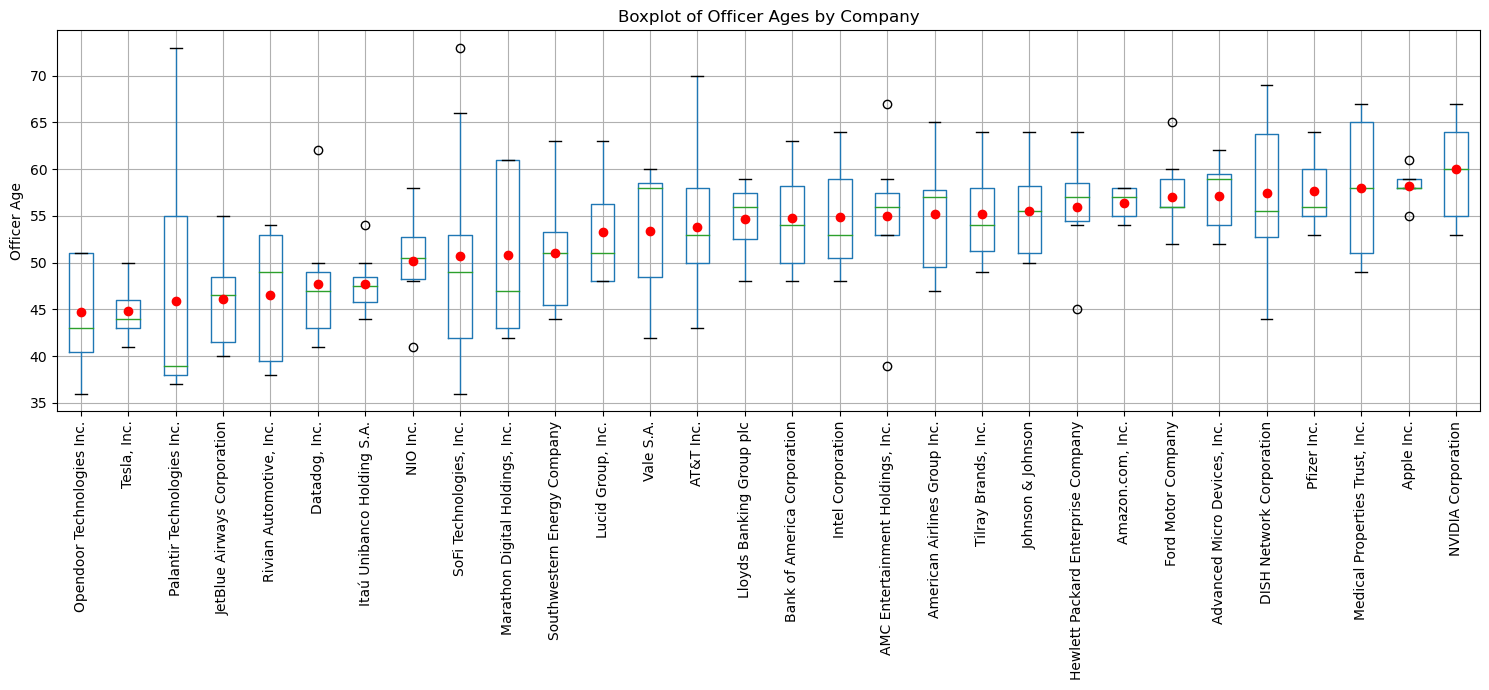

In [17]:
# Dictionary to store data
data_dict = {}

for ticker in top_30_tickers:
    company_info = yf.Ticker(ticker).info
    
    company_name = company_info.get('longName', ticker)
    company_officers = company_info.get('companyOfficers', [])
    
    current_officer_ages = []

    for officer in company_officers:
        # Check if 'age' key exists for the current officer
        if 'age' in officer:
            current_officer_ages.append(officer['age'])

    # Append the data to our dictionary
    data_dict[company_name] = current_officer_ages

# Convert data to DataFrame
df = pd.DataFrame.from_dict(data_dict, orient='index').transpose()

# Compute mean age for each company
mean_ages = df.mean()

# Sort columns based on mean age
sorted_columns = mean_ages.sort_values(ascending=True).index.tolist()
df = df[sorted_columns]

# Plot the data
plt.figure(figsize=(15, 7))
df.boxplot(showmeans=True, meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"red"})
plt.xticks(rotation=90)
plt.ylabel('Officer Age')
plt.title('Boxplot of Officer Ages by Company')
plt.tight_layout()
plt.show()


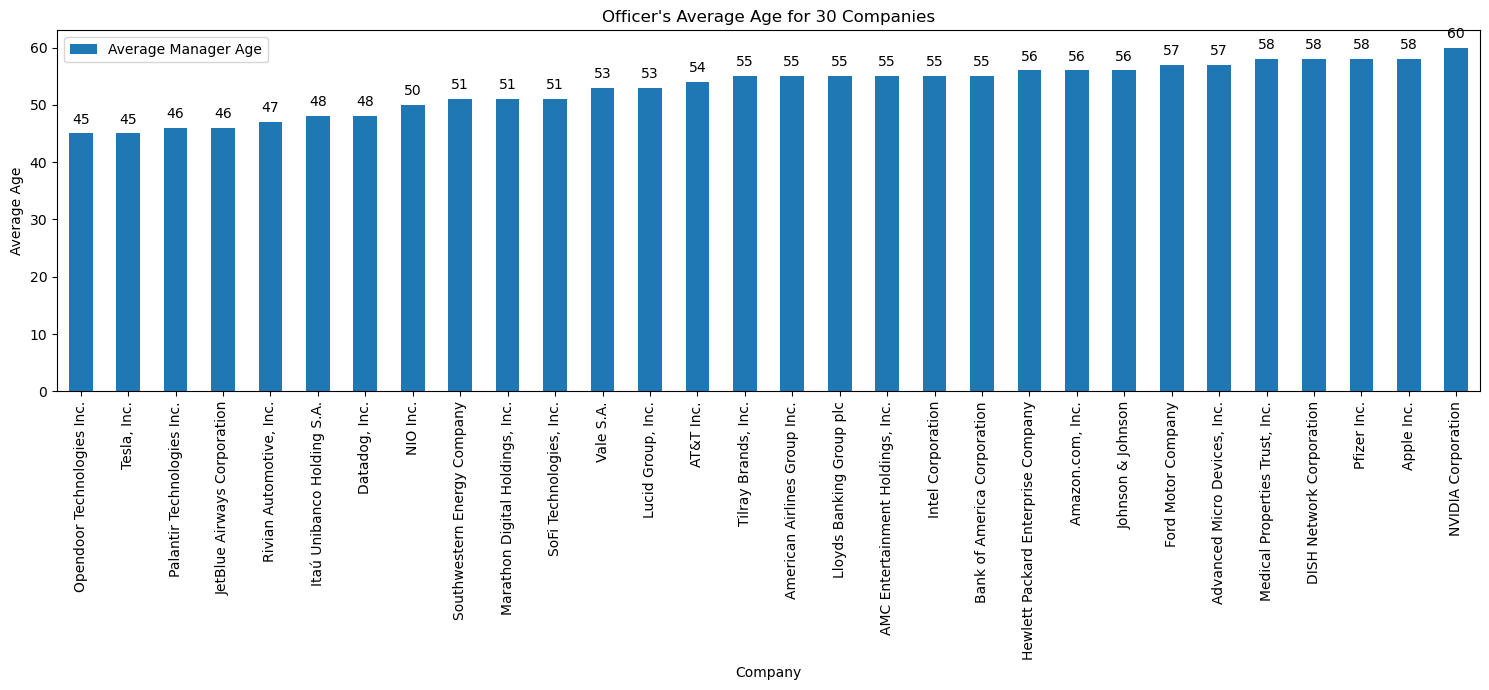

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV into a pandas DataFrame
df = pd.read_csv('top_30_df.csv')

# Assuming your columns are named 'Company' and 'Average Manager Age', you can plot directly
df.sort_values(by='Average Manager Age', ascending=True, inplace=True)

# Plot the bar chart
ax = df.plot(x='company', y='Average Manager Age', kind='bar', figsize=(15,7))

# Annotate each bar with its corresponding value
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10),
                textcoords='offset points')

plt.title("Officer's Average Age for 30 Companies")
plt.ylabel('Average Age')
plt.xlabel('Company')
plt.xticks(rotation=90)  # Rotate company names for better readability
plt.tight_layout()  # This ensures that everything fits well
plt.show()


In [25]:
# Read the CSV into a pandas DataFrame
df = pd.read_csv('top_30_df.csv')

# Compute mean, median, and mode
mean_age = df['Average Manager Age'].mean()
median_age = df['Average Manager Age'].median()
mode_age = df['Average Manager Age'].mode()

print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age:.2f}")
print(f"Mode Age: {mode_age.values[0] if not mode_age.empty else 'No mode'}")  # mode() returns a Series, so we extract the first value


Mean Age: 53.07
Median Age: 55.00
Mode Age: 55
